Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf

C:\Users\nahas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)   # checking the version of TensorFlow

2.16.1


##### Loading the data

In [3]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/training', labels='inferred', label_mode="int", class_names=None, color_mode="rgb", batch_size=32, image_size=(256, 256),
    shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False,
    crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True,
    )

Found 2392 files belonging to 2 classes.


In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/testing', labels='inferred', label_mode="int", class_names=None, color_mode="rgb", batch_size=32, image_size=(256, 256),
    shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False,
    crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True,
    )

Found 597 files belonging to 2 classes.


In [5]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Check the class names from the class_names attribute of the datasets

In [7]:
class_names = training_dataset.class_names
print(class_names)

['flip', 'notflip']


In [8]:
class_names_test = test_dataset.class_names
print(class_names_test)

['flip', 'notflip']


##### Visualize the data

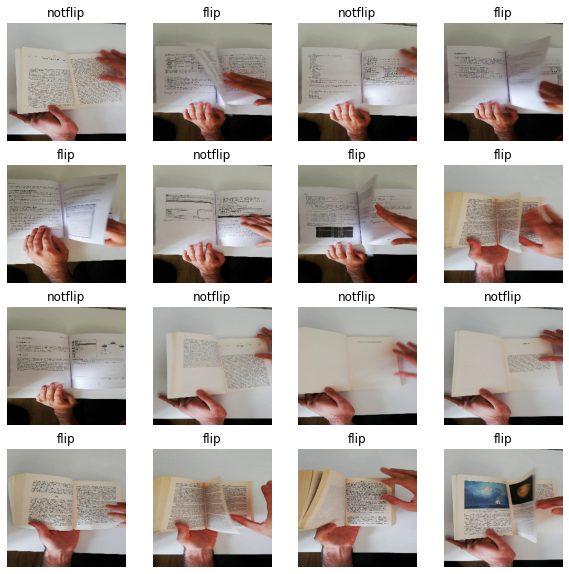

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_dataset.take(1):
  for i in range(16):                                # printing 16 images
    ax = plt.subplot(4, 4, i + 1)                    # specifying the number of images in rows and columns
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in training_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


This is a batch of 32 images of shape 256x256x3 (the last dimension refers to color channels RGB). 
The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

##### Standardization / Normalization

In [11]:
# Data rescaling - The RGB channel values are in the [0, 255] range. We'll standardize values to be in the [0, 1] range
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [12]:
training_dataset_rescaled = training_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(training_dataset_rescaled))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.94018084


##### Create the model

In [13]:
#from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [46]:
num_classes = len(class_names)

model = Sequential([
#  layers.Rescaling(1./255, input_shape=(180, 180, 2)),   
  #layers.Rescaling(1./255 ),   
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

###### Compile the model

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

View all the layers of the network using the Keras Model.summary method

In [48]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##### Train the model

In [49]:
epochs=1
history = model.fit(
  training_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 576ms/step - accuracy: 0.6341 - loss: 105.2498 - val_accuracy: 0.9464 - val_loss: 0.1972


##### Visualize training results

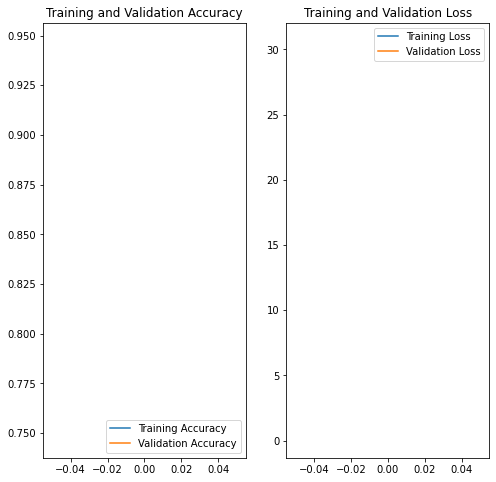

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
----- breakpoint -----

SyntaxError: invalid syntax (2768986962.py, line 1)

##### Saving and loading the model

In [ ]:
model.save('tfmodel')

In [ ]:
#del model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('tfmodel')